# U1B model: SI cross section

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

In [3]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

Read the scanning

In [13]:
#Read old file
xd = pd.read_csv('general-scan-TWp30.csv')
del xd['Unnamed: 0']

xd.shape

(349622, 105)

## Dark matter $\Omega h^2$
Planck results 2018

In [15]:
#Experimental values for DM:Planck results 2018
e = 15
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.102 0.12 0.13799999999999998


In [16]:
xd = xd[np.logical_and(xd.Omega > Omega_min, xd.Omega < Omega_max)]

In [17]:
xd.shape

(3115, 105)

## Neutrino masses
Status of neutrino oscillations 2018: first hint for normal mass ordering and improved CP sensitivity. https://arxiv.org/abs/1708.01186

Improbing the reconstruction of the neutrino masses to the $10\%$

In [18]:
xd = xd[np.logical_and(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2<10., np.abs(xd.mnu3-xd.mv3)*100/xd.mv3<10.)]

In [19]:
xd.shape

(3098, 105)

# Direct and indirec detection

In [20]:
from indirectdirect import *

In [21]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

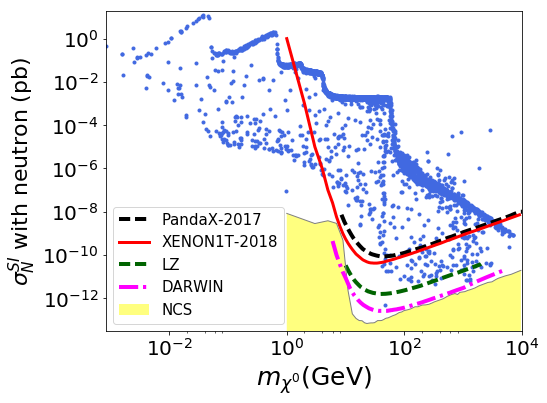

In [22]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=4,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,9.5e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=4,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':15},loc='best')

plt.xlim(xd.mchi.min(),1.0e4)
plt.ylim(3e-14,2e1)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

PandaX limit buscar

### Anality SI cross-section

In [23]:
#Parameters
fN = 0.25
v = 244.868782
vev = 244.868782
#nucleon mass in GeV (proton and neutron mass)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000
#MW      = 80.385
#MZ      = 91.187

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

actually, where $Z$ is teh $Z^{'}$

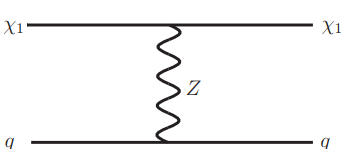

In [24]:
from IPython.display import Image
Image("vector-SI.png", width=400)

\begin{align}
\sigma^{SI}_{\chi N}= \dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{g_B^4}{M_{Z'}^4}B^2
\end{align}

https://arxiv.org/pdf/1409.8165.pdf

In [25]:
xd['mr'] = MNn*xd.mchi/(MNn+xd.mchi)

In [26]:
xd['SIZp_vector'] = (1./(4*np.pi))*xd.mr**2*(xd.g1p**4/xd.MZp**4)*(-2+3)**2*GeVtomin2topb

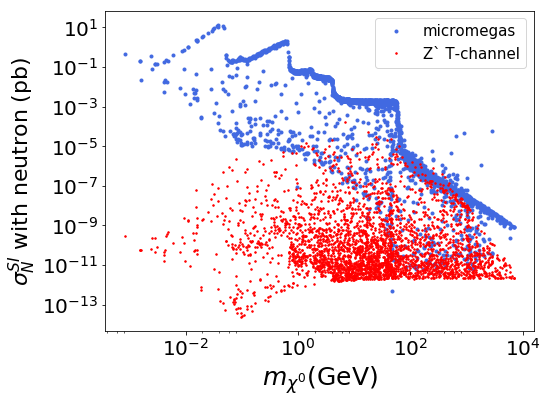

In [30]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'micromegas')
plt.loglog(xd.mchi, xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z` T-channel')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':15},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

For not $U(1)_B$ model. When Z' interac with the nucleons like the SM Z gage boson

\begin{align}
\sigma^{SI}_{\chi N} = \dfrac{a^2}{\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\left[\dfrac{Z f_{p}+(A-Z)f_n}{A}\right]^2
\end{align}

https://arxiv.org/pdf/1501.03490.pdf

\begin{align}
f_p =& \dfrac{g_{\chi Z'}}{m^2_{Z^{'}}}(2g_{uv}+g_{dv})\\ 
f_n =& \dfrac{g_{\chi Z'}}{m^2_{Z^{'}}}(g_{uv}+2g_{dv}) 
\end{align}

In [35]:
guv = -(np.sqrt(alpha*4*np.pi)/4.)*((5./3.)*np.tan(Theta_W)-1./np.tan(Theta_W))
gdv = +(np.sqrt(alpha*4*np.pi)/4.)*((1./3.)*np.tan(Theta_W)-1./np.tan(Theta_W))

print(guv,gdv)

0.0655514478608 -0.121798647679


In [36]:
xd['SIZp_vector_full'] =(xd.mr**2/np.pi)*((xd.g1p/2)/xd.MZp**2)**2*((Z*(2*guv+gdv)+(A-Z)*(guv+2*gdv))/A)**2*GeVtomin2topb

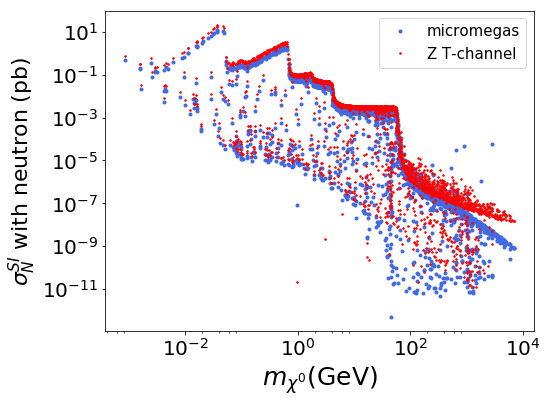

In [38]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'micromegas')
plt.loglog(xd.mchi, xd.SIZp_vector_full, color='red', marker='.',ms=3,linestyle='', label=r'Z T-channel')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':15},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

Scalar interaction with the Higss

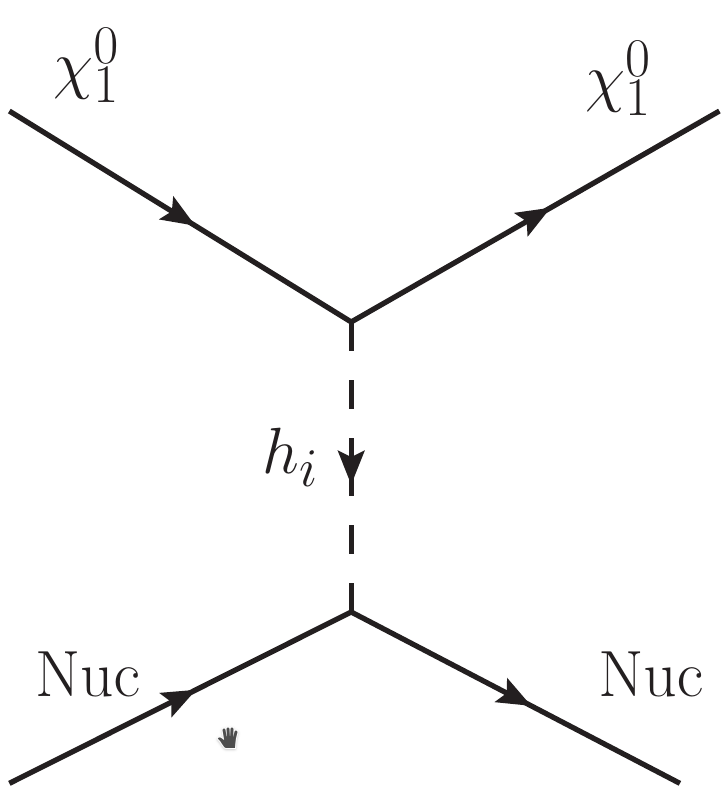

In [39]:
from IPython.display import Image
Image("SI-mass-basis.png", width=200)

\begin{equation}
\sigma_{SI} = 
\dfrac{m_r^2}{\pi}\left(\dfrac{(f_N) m_N}{v_{\text{SM}}}\right)^2
\left(\dfrac{C_{1}}{mh_1^2} + \dfrac{C_{2}}{mh_2^2} \right)^2
\end{equation}

\begin{equation}
C_{\chi^0\chi^0 h_k} = C_{k} = \dfrac{-i}{\sqrt{2}}\lambda_{a1}Z^H_{k2}
\end{equation}

In [40]:
Lambda1 = -0.130
vev = 244.868782
xd['thetaB'] = np.arctan(2*(-vev*xd.vx*xd.Lambda3)/((-3*(vev**2)*Lambda1 + (1/2)*(2*Lambda1*vev**2+xd.Lambda3*xd.vx**2) - 0.5*(xd.vx)**2*xd.Lambda3)-((1/2)*(xd.Lambda3*vev**2 + 2*xd.Lambda2*xd.vx**2) - 3*xd.vx**2*xd.Lambda2-0.5*vev**2*xd.Lambda3)))/2

In [41]:
xd['cxx1'] = (-1/np.sqrt(2)*xd.YA1*np.sin(xd.thetaB))
xd['cxx2'] = (-1/np.sqrt(2)*xd.YA1*np.cos(xd.thetaB))

In [42]:
xd['SI_scalar'] =(xd.mr**2/np.pi)*(fN*MNn/vev)**2*(xd.cxx1*np.cos(xd.thetaB)/xd.mh1**2 + xd.cxx2*np.sin(xd.thetaB)/xd.mh2**2)**2*GeVtomin2topb

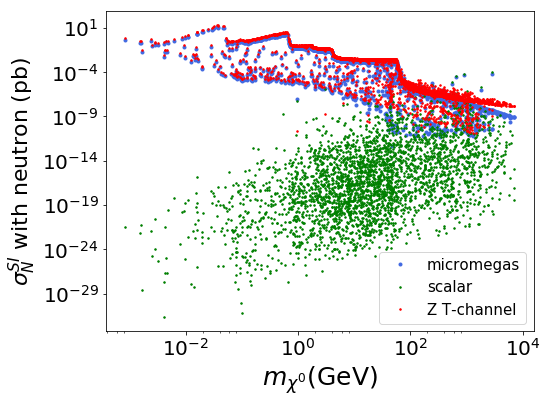

In [44]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'micromegas')
plt.loglog(xd.mchi, xd.SI_scalar, color='green', marker='.',ms=3,linestyle='', label=r'scalar')
plt.loglog(xd.mchi, xd.SIZp_vector_full, color='red', marker='.',ms=3,linestyle='', label=r'Z T-channel')
#plt.loglog(xd.mchi, xd.SI_scalar+xd.SIZp_vector_full, color='red', marker='.',ms=3,linestyle='', label=r'Z´ T-channel')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':15},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

With SM Z gauge boson 

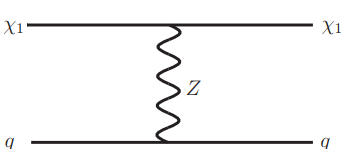

In [62]:
from IPython.display import Image
Image("vector-SI.png", width=400)

\begin{equation}
\sigma_{SI}^{A,Z} =\color{red}{2}  \dfrac{G_F^2 \mu^2}{8\pi}(\cos^2{\theta_L}+\cos^2{\theta_R})^2
\left[(1-4\sin^2\theta_W )Z-(A-Z)\right]^2
\end{equation}

\begin{equation}
\sigma_{SI}^{N} = \dfrac{m_N^2}{\mu^2 A^2}\sigma_{SI}^{A,Z}
\end{equation}

https://arxiv.org/abs/1510.06151

In [ ]:
#For the neutron
xDM['SIZ_vector'] = (2./1.)*GF**2*MNn**2/(8.*np.pi*A**2)*(xDM.XV11**2+xDM.XU11**2)**2*(0.*(1.-4.*(1.- (MW/MZ)**2))*Z-(A-Z))**2*GeVtomin2topb

# 